In [66]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [67]:
        #An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5).
        #After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.Content 
        #In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
        #Then, they performed segmented outreach and communication for different segment of customers.
        #This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
        #You are required to help the manager to predict the right group of the new customers.#

In [68]:
data=pd.read_csv("customersegmentation.csv")

In [135]:
data.head()


,ID,Gender,Marital_Status,Age,Graduated,Work_Ex,Spending_Score,Family_Size,Income_Cat,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,458982,0,1,61,1,1.0,2,3.0,5,2,0,0,0,0,1,0,0,0,0
1,458983,1,1,63,1,0.0,2,5.0,5,2,0,0,0,0,1,0,0,0,0
2,458984,0,1,39,1,0.0,1,3.0,5,2,1,0,0,0,0,0,0,0,0
3,458985,0,0,23,0,1.0,0,4.0,5,3,0,0,0,0,0,1,0,0,0
4,458986,0,0,18,0,7.0,0,4.0,5,3,0,0,0,0,0,1,0,0,0


In [70]:
data.shape

(10695, 11)

In [71]:
data.columns = ['ID', 'Gender', 'Marital_Status', 'Age','Graduated','Profession','Work_Ex', 'Spending_Score','Family_Size','Income_Cat','Segmentation']

In [72]:
# Looking for missing values in dataset

data.isna().sum()

ID                   0
Gender               0
Marital_Status     190
Age                  0
Graduated          102
Profession         162
Work_Ex           1098
Spending_Score       0
Family_Size        448
Income_Cat         108
Segmentation         0
dtype: int64

In [73]:
data = data.dropna()
data.shape

(8819, 11)

In [74]:
data.isna().sum()

ID                0
Gender            0
Marital_Status    0
Age               0
Graduated         0
Profession        0
Work_Ex           0
Spending_Score    0
Family_Size       0
Income_Cat        0
Segmentation      0
dtype: int64

Segmentation Data Visualisation

In [75]:
data.Segmentation.value_counts()

A    3770
D    1757
C    1720
B    1572
Name: Segmentation, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

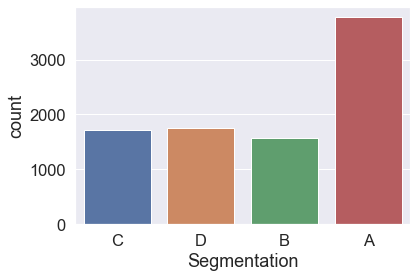

In [76]:
sns.countplot(data.Segmentation)

In [77]:
data.Segmentation=pd.Categorical(data.Segmentation,categories=['A','B','C','D'],ordered=True).codes

Gender Data Visualisation

In [78]:
data['Gender'].dtype

dtype('O')

In [79]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
data['Gender'].value_counts()

Male      4861
Female    3958
Name: Gender, dtype: int64

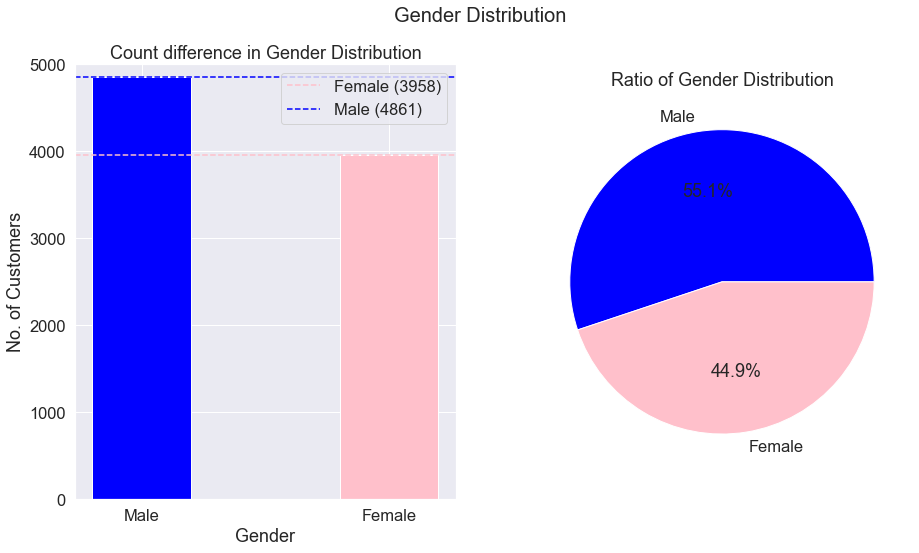

In [81]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts()


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['blue','pink'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,5000)
ax0.axhline(y=data['Gender'].value_counts()[1], color='pink', linestyle='--', label=f'Female ({data.Gender.value_counts()[1]})')
ax0.axhline(y=data['Gender'].value_counts()[0], color='blue', linestyle='--', label=f'Male ({data.Gender.value_counts()[0]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['blue','pink'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=20);
plt.show()

In [82]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

Age Data Visualisation

In [83]:
data['Age'].describe()

count    8819.000000
mean       43.517859
std        16.581537
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

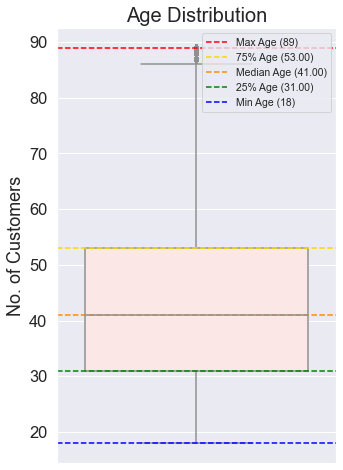

In [84]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="mistyrose")
ax.axhline(y=data['Age'].max(), linestyle='--',color='red', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='gold', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='darkorange', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='green', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='blue', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

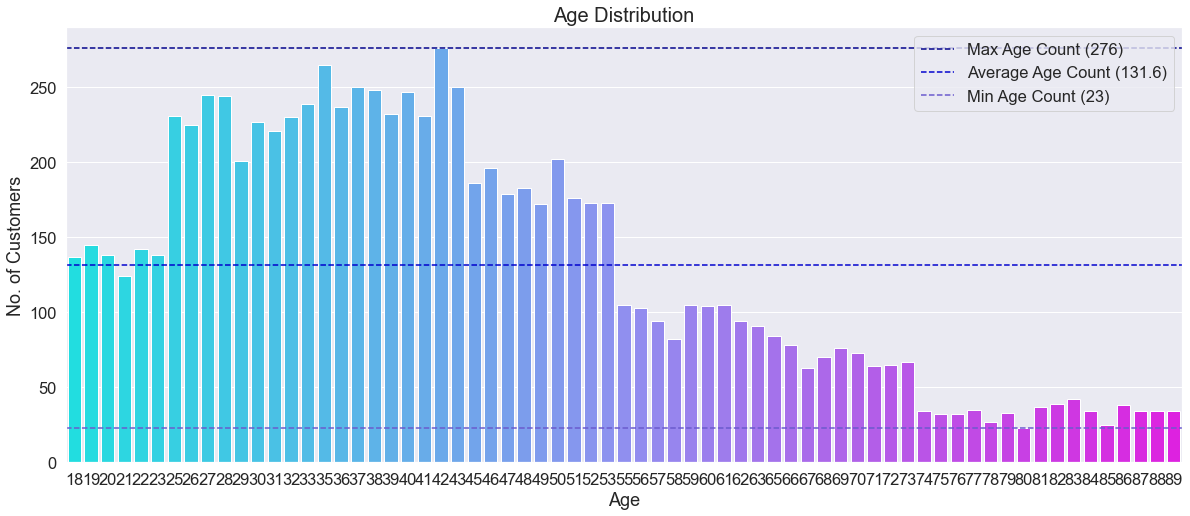

In [85]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='cool')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='darkblue', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='mediumblue', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='slateblue', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Profession Data Visualisation

In [86]:
data.Profession.value_counts()

Artist           2888
Healthcare       1414
Entertainment    1063
Doctor            798
Engineer          777
Lawyer            673
Executive         652
Marketing         325
Homemaker         229
Name: Profession, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

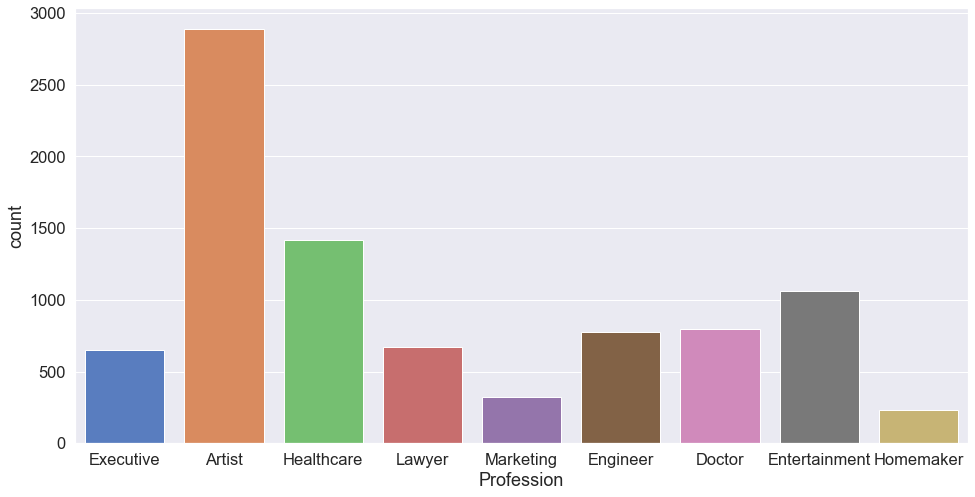

In [87]:
plt.figure(figsize=(16,8))
sns.countplot(data.Profession,palette='muted')

In [88]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)
data=data.join(profession)

Graduated Data Visualisation

In [89]:
data['Graduated'].value_counts()

Yes    5594
No     3225
Name: Graduated, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

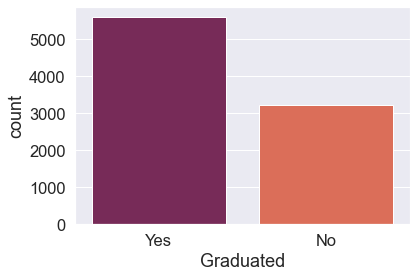

In [90]:
sns.countplot(data.Graduated,palette='rocket')

In [91]:
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

Spending Score Visualisation

In [92]:
data['Spending_Score'].value_counts()

Low        5325
Average    2183
High       1311
Name: Spending_Score, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

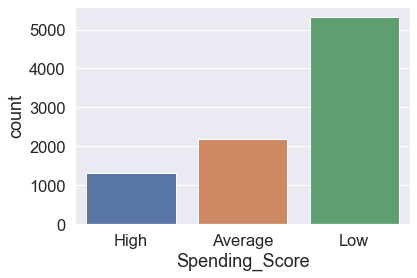

In [93]:
sns.countplot(data.Spending_Score)

In [94]:
data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

Var_1 Visualisation

In [95]:
data.Income_Cat.value_counts()

Cat_6    5897
Cat_4    1169
Cat_3     829
Cat_2     478
Cat_7     218
Cat_1     131
Cat_5      97
Name: Income_Cat, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Cat', ylabel='count'>

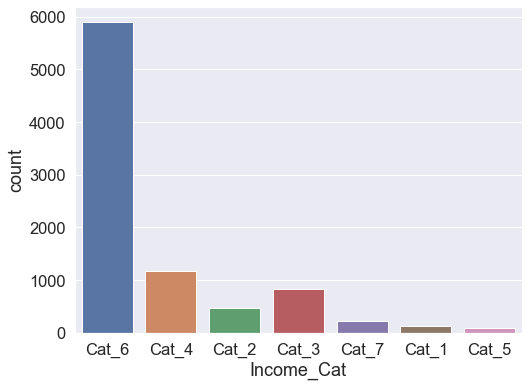

In [96]:
#Var_1 is income range attribute with var_1 being the highest paid and Var_7 being the lowest paid

plt.figure(figsize=(8,6))
sns.countplot(data.Income_Cat)

In [97]:
data.Income_Cat=pd.Categorical(data.Income_Cat).codes

Marital Status Data Visualisation

In [98]:
data.Marital_Status.value_counts()

Yes    5216
No     3603
Name: Marital_Status, dtype: int64

C:\Users\sjain205\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

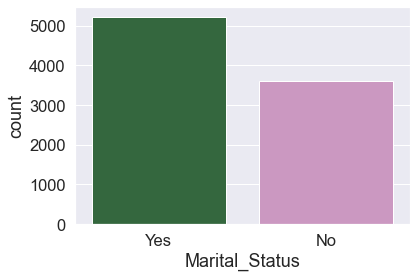

In [99]:
sns.countplot(data.Marital_Status,palette='cubehelix')

In [100]:
data.Marital_Status=pd.Categorical(data.Marital_Status,categories=['No','Yes'],ordered=True).codes

Work Experience Data Visualisation

(array([5729.,  337.,  631.,  248.,  242.,  771.,  569.,  121.,   55.,
         116.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

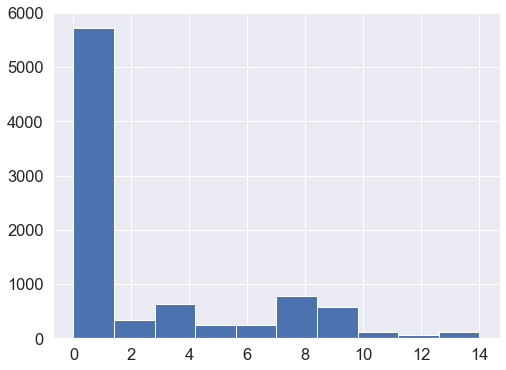

In [101]:
plt.figure(figsize=(8,6))
plt.hist(data.Work_Ex)

label=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
label

In [102]:
correlation_data=pd.DataFrame(data)
correlation_data.drop(['ID'],axis=1,inplace=True)
correlation_data

,Gender,Marital_Status,Age,Graduated,Work_Ex,Spending_Score,Family_Size,Income_Cat,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,2,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,2,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,2,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,3,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,3,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,1,43,1,0.0,1,2.0,5,2,1,0,0,0,0,0,0,0,0
10691,1,0,31,1,1.0,0,4.0,5,3,1,0,0,0,0,0,0,0,0
10692,0,0,22,0,1.0,0,3.0,5,3,1,0,0,0,0,0,0,0,0
10693,1,1,66,1,0.0,1,3.0,5,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

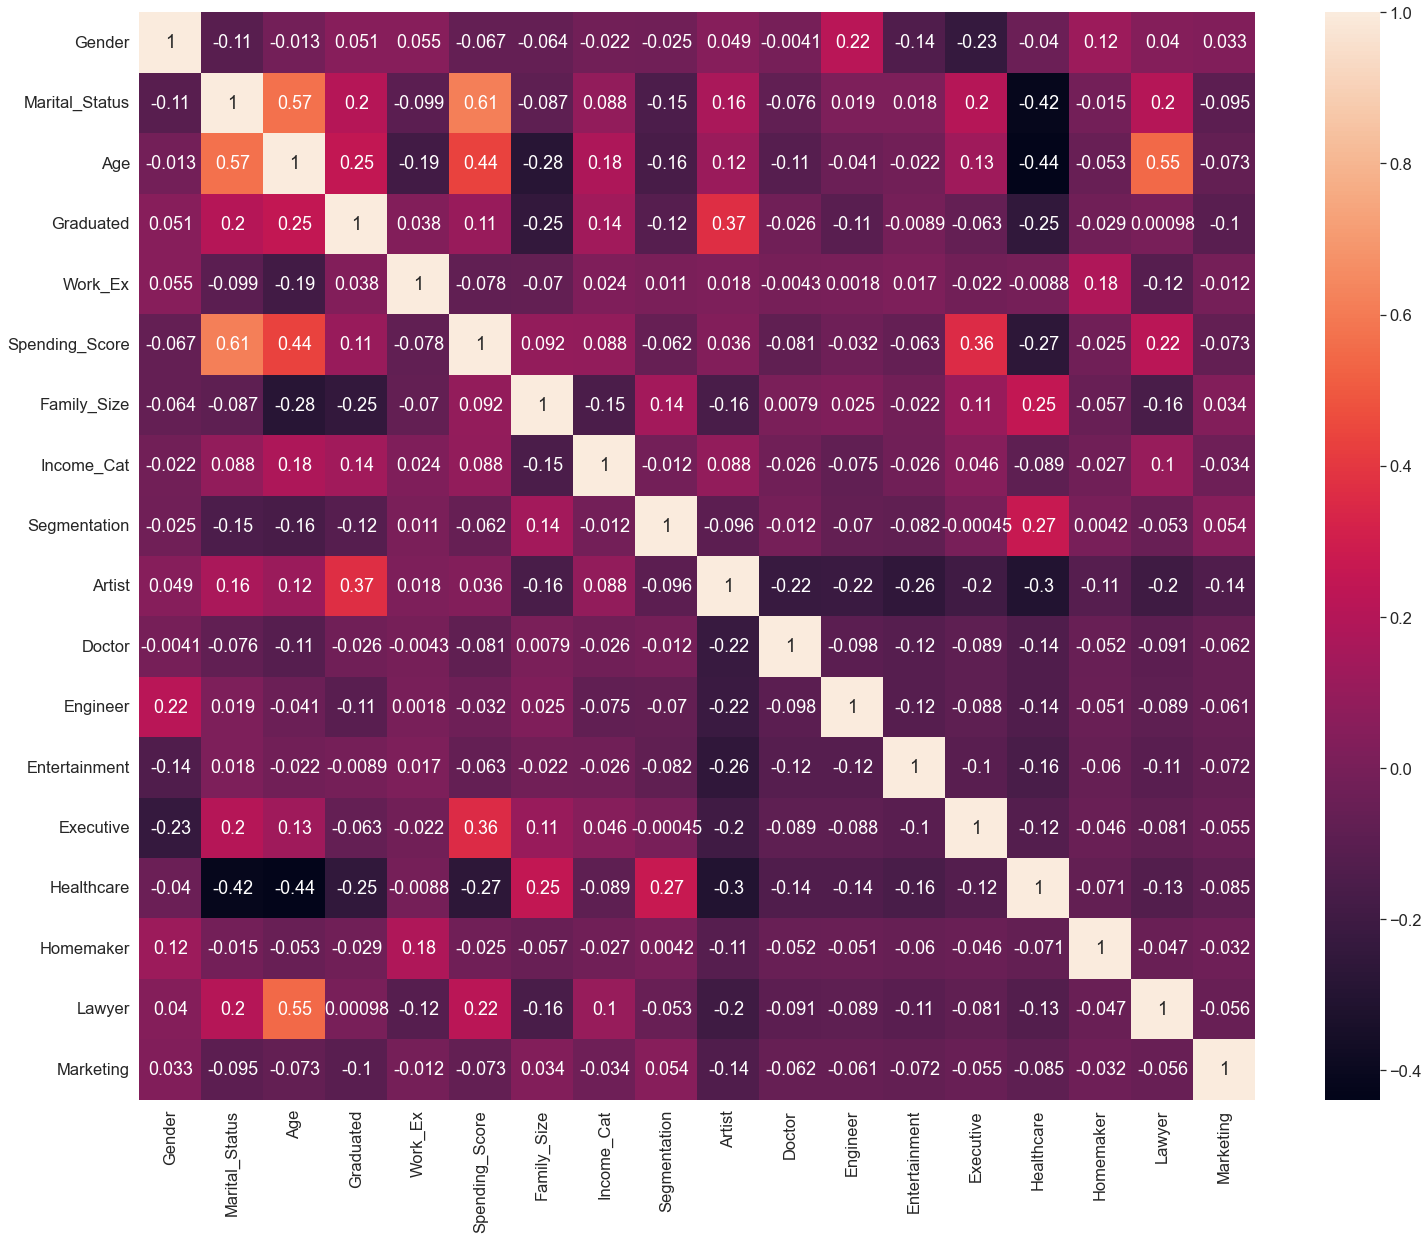

In [103]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_data.corr(),annot=True)

In [118]:
# apply model fit on the training data
X = correlation_data.drop('Segmentation', axis=1)
X = correlation_data[['Age', 'Graduated', 'Work_Ex', 'Spending_Score']]
X

,Age,Graduated,Work_Ex,Spending_Score
0,61,1,1.0,2
1,63,1,0.0,2
2,39,1,0.0,1
3,23,0,1.0,0
4,18,0,7.0,0
...,...,...,...,...
10690,43,1,0.0,1
10691,31,1,1.0,0
10692,22,0,1.0,0
10693,66,1,0.0,1


In [105]:
# #cols = ['Segmentation', 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing']
# X = correlation_data.drop(['Segmentation', 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], axis=1)
# X

In [120]:
y = correlation_data['Segmentation']
y

0        2
1        2
2        2
3        3
4        3
        ..
10690    2
10691    3
10692    3
10693    0
10694    1
Name: Segmentation, Length: 8819, dtype: int8

In [107]:
# #plt.scatter(X[:,0], X[:,1], marker="o", c=y, s=100, cmap="plasma")
# import matplotlib.pyplot as plt
# ax.scatter(correlation_data[2], correlation_data[3], correlation_data[4], marker=mark, color=color, linewidths=5)
    
# plt.show()

In [121]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
X_train, X_test, y_train, y_test

(       Age  Graduated  Work_Ex  Spending_Score
 10031   50          0      1.0               1
 607     46          1      7.0               0
 7031    35          0      1.0               0
 4774    37          1      8.0               1
 10203   58          1      0.0               1
 ...    ...        ...      ...             ...
 5440    67          1      9.0               0
 9546    49          1      1.0               2
 6000    32          0      0.0               0
 4017    79          1      1.0               2
 3397    42          1      0.0               1
 
 [7055 rows x 4 columns],
        Age  Graduated  Work_Ex  Spending_Score
 6433    65          1      0.0               1
 455     53          1      2.0               0
 9929    73          0      0.0               2
 4105    29          0      5.0               0
 9748    43          1      1.0               0
 ...    ...        ...      ...             ...
 27      47          1      0.0               2
 8101    52 

In [123]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((7055, 4), (1764, 4))

In [124]:
# Changing the index of the records into range
X_train.index=range(len(X_train))
y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
y_test.index=range(len(y_test))

## K nearest neighbours by Sorting the Euclidean distance

In [125]:
def nearest_Neighbours(X_train,y_train,X_test,K):
    dist=[]
    for i in range(len(X_train)):
        #initialize distance = 0
        euclidean_Dist=0
        for j in range(len(X_train.columns)):   
                #sum of total distance
                euclidean_Dist+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        dist.append((euclidean_Dist,i,y_train.iloc[i]))
        #sort in ascending order of distance & select top k nearest distances
        dist = sorted(dist, key=lambda z: z[0])[0:K]
    return dist


## Predicting the new data point

In [126]:
#Predicting the label of the new piece of data based in k-nearest neighbours

def knn_prediction(X_train,y_train,X_test,K):
    neighbours=[]
    pred_outcome=[]
    for i in range(len(X_test)):
        neighbours.append(nearest_Neighbours(X_train,y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        top_neighbours = {}
        for j in i:
            #list of distances of top k-neighbours
            if j[-1] in top_neighbours.keys():
                top_neighbours[j[-1]]=top_neighbours[j[-1]]+1
            else:
                top_neighbours[j[-1]]=1
        pred_outcome.append(sorted(top_neighbours,key=top_neighbours.get,reverse=True)[0])
    return pred_outcome #return the label 


## Accuracy calculation of predicted data point

In [127]:
# Accuracy of correctly predicted 
def knn_getAccuracy(actual,predicted):
    correctly_pred=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correctly_pred+=1
    return round((correctly_pred/len(actual))*100,2)


## Accuracy of Model

In [128]:
# Accuracy of predicted species
output=knn_prediction(X_train,y_train,X_test,100)

knn_getAccuracy(y_test,output)

48.36

## Checking using KNeighborsClassifier 

In [129]:
# Packages
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [131]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train, y_train) #fitting the KNN

KNeighborsClassifier()

In [150]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.53
Accuracy of K-NN classifier on test set: 0.44


In [182]:
print("Preliminary model score:")
print(knn.score(X_test,y_test))


Preliminary model score:
0.4387755102040816


In [183]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

<IPython.core.display.Javascript object>


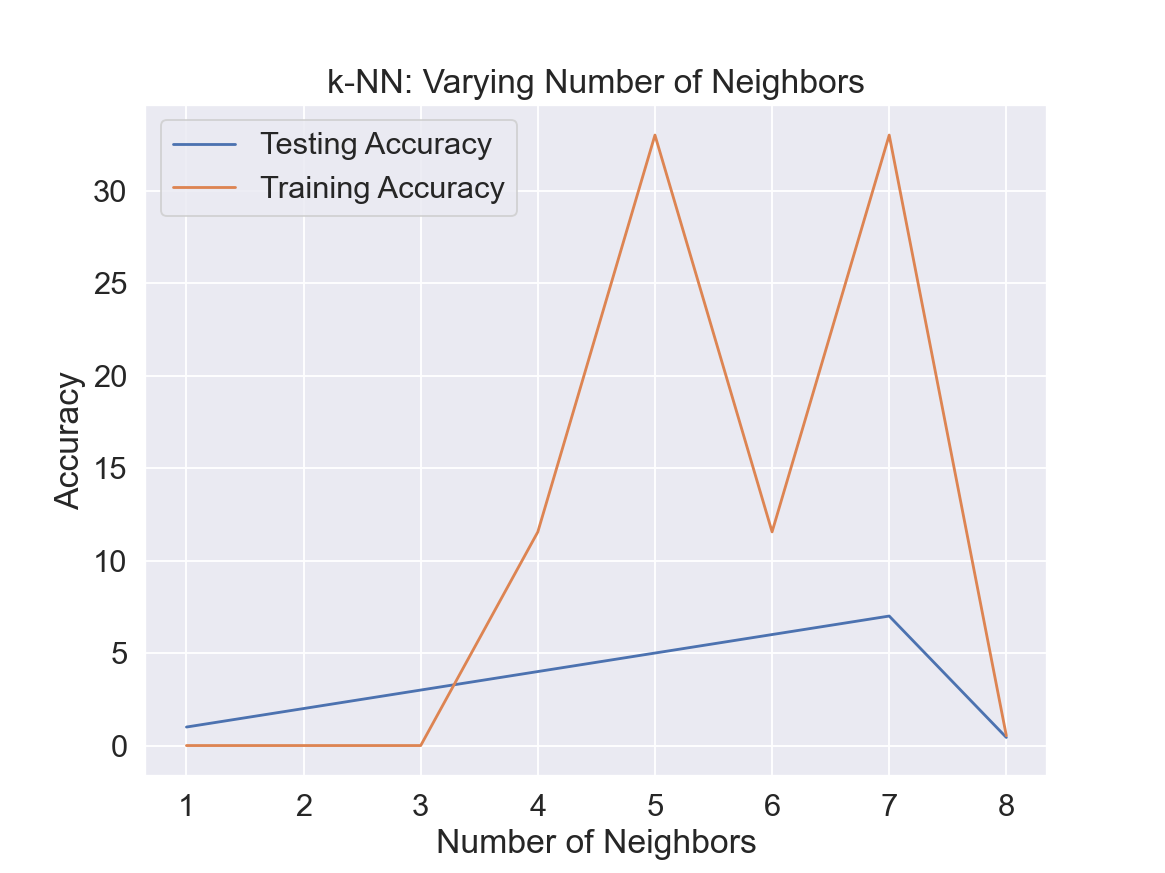

In [184]:
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
 
    # Compute accuracy on the training set
train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
test_accuracy[i] = knn.score(X_test, y_test)
# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()